<a href="https://colab.research.google.com/github/rosesardina/ECE61000-EnergyConversion/blob/main/induction_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook created by:<br>
Dionysios Aliprantis  |  Professor of
Electrical and Computer Engineering, Purdue University<br>
465 Northwestern Ave., West Lafayette, Indiana 47907-2035<br>
765.494.4434  |  dionysis@purdue.edu<br>
https://engineering.purdue.edu/~dionysis/<br>

Revision: November 7, 2021

Note: This notebook is intended for use by students of ECE 61000 Energy Conversion at Purdue University. The material is subject to change without notice. Unless otherwise noted, figures are obtained from the course textbook: P. Krause, O. Wasynczuk, S. Sudhoff, and S. Pekarek, *Analysis of Electric Machinery and Drive Systems*, Third edition, 2013, Wiley-IEEE Press.

---

# Induction motors: Modeling and simulation

*Objectives:*

* Simulate the transient response of a three-phase squirrel-cage induction motor.

*Prerequisites:*

* General interest in power systems engineering and electromechanical devices ;)
* Complete the previous Jupyter notebooks.
* Watch the lecture videos of the Induction Machines section.
* Study the material of Chapter 6 (Symmetrical Induction Machines).

<br>


---




## Squirrel-cage induction motor

We will study the dynamic performance of a three-phase squirrel-cage induction motor.
This machine is analyzed in Chapter 6 of the textbook.

The machine cross-section and winding diagram is shown in Fig. 6.2-1, page 217.
This machine is modeled with two three-phase windings.
The rotor windings are short-circuited.

![induction machine](https://drive.google.com/uc?id=1lWxCpW9KeuvLZiwbsttg-lNz_UmuqAZ2)

The *qd0* equivalent circuits in the arbitrary reference frame are shown in Fig. 6.5-1, page 226.
Primes denote variables referred to the stator side.

![equivalent circuits](https://drive.google.com/uc?id=18y-twtutcMswJOHGmYNx8BV_yn-Cd1Wj)





### Dynamic equations

We will structure the computer simulation according to Section 6.14, page 261. This is similar to the approach we took for the synchronous generator.
The flux linkages of the windings will be the state variables.
We will work in the arbitrary reference frame.
Here are the main steps:

First, we define the *qd*  magnetizing flux linkages as
\begin{align}
\lambda_{mq} &= L_{M} \cdot (i_{qs} + i_{qr}^{\prime} ) \\
\lambda_{md} &= L_{M} \cdot (i_{ds} + i_{dr}^{\prime} ) \,.
\end{align}
These serve as auxiliary variables to help simplify our equations.
The zero axes will be ignored.

Then, we express the stator and rotor winding currents based on the flux linkage equations as:
\begin{align}
i_{qs} &= (L_{ls})^{-1} \cdot (\lambda_{qs} - \lambda_{mq} ) \\
i_{ds} &= (L_{ls})^{-1} \cdot (\lambda_{ds} - \lambda_{md} ) \\
i_{qr}^{\prime} &= (L_{lr}^{^\prime})^{-1} \cdot (\lambda_{qr}^{\prime} - \lambda_{mq} ) \\
i_{dr}^{\prime} &= (L_{lr}^{^\prime})^{-1} \cdot (\lambda_{dr}^{\prime} - \lambda_{md} )
\end{align}

Substituting these expressions for the currents in the expressions for the magnetizing  flux linkages yields, after elementary manipulations:
\begin{align}
\lambda_{mq} &= L_{aq} \cdot \left( \frac{\lambda_{qs}}{L_{ls}} + \frac{\lambda_{qr}^{\prime}}{L_{lr}^\prime} \right) \\
\lambda_{md} &= L_{ad} \cdot \left( \frac{\lambda_{ds}}{L_{ls}} + \frac{\lambda_{dr}^{\prime}}{L_{lr}^\prime} \right) \,,
\end{align}
where we have defined the inductances
\begin{equation}
L_{aq} = L_{ad} = \left( \frac{1}{L_{M}} + \frac{1}{L_{ls}} + \frac{1}{L_{lr}^{\prime}} \right) ^{-1} \,.
\end{equation}
We have thus expressed the magnetizing flux linkages as functions of the states.
Therefore, the currents have been expressed as functions of the states as well.

The system dynamic equations are:
\begin{align}
p \lambda_{qs} &= v_{qs} - \omega \lambda_{ds} - \frac{r_s}{L_{ls}}(\lambda_{qs} - \lambda_{mq} ) \\
p \lambda_{ds} &= v_{ds} + \omega \lambda_{qs} - \frac{r_s}{L_{ls}}(\lambda_{ds} - \lambda_{md} ) \\
p \lambda_{qr}^{\prime} &= -(\omega - \omega_r) \lambda_{dr}' -\frac{r^\prime_r}{L_{lr}^{^\prime}}  (\lambda_{qr}^{\prime} - \lambda_{mq} ) \\
p \lambda_{dr}^{\prime } &= (\omega - \omega_r) \lambda_{qr}' -\frac{r^\prime_r}{L_{lr}^{^\prime}}  (\lambda_{dr}^{\prime} - \lambda_{md} ) \,.
\end{align}

We  append these equations with the equation of motion of the rotor,
$$
\frac{2J}{P} p\omega_{r} = T_e - T_L - T_{\text{fric}} \,,
$$
where $J$ is the moment of inertia, $P$ is the number of poles, $T_L$ is the load torque, $T_{\text{fric}}$ denotes friction torque (e.g., $T_{\text{fric}} = D \omega_r$), and the electromagnetic torque (positive for motor action) is
$$
T_e = \frac{3}{2} \frac{P}{2} (\lambda_{ds} i_{qs} - \lambda_{qs} i_{ds} ) \,.
$$

This is a nonlinear ODE system, $p\mathbf{y} = \mathbf{f}(\mathbf{y}, t)$, due to the presence of state variable product terms (e.g., $\omega_r \lambda_{qr}'$ and $\lambda_{ds} i_{qs}$).


### Dynamic equations in terms of flux linkages per second

For numerical reasons, we may want to re-write the dynamic equations in terms of flux linkages per second, $\psi = \omega_b \lambda$, and reactances, $X = \omega_b L$, where $\omega_b$ is base (rated) frequency.
Hence, when expressed in a per-unit system, all states should have values on the order of 1.0.

In this case, the system dynamic equations are:
\begin{align}
\tfrac{1}{\omega_b} p \psi_{qs} &= v_{qs} -  \tfrac{\omega}{\omega_b} \psi_{ds} - \frac{r_s}{X_{ls}}(\psi_{qs} - \psi_{mq} ) \\
\tfrac{1}{\omega_b} p \psi_{ds} &= v_{ds} + \tfrac{\omega}{\omega_b}  \psi_{qs} - \frac{r_s}{X_{ls}}(\psi_{ds} - \psi_{md} ) \\
\tfrac{1}{\omega_b} p \psi_{qr}^{\prime} &= -  \tfrac{\omega - \omega_r}{\omega_b} \psi_{dr}' - \frac{r^\prime_r}{X_{lr}^{^\prime}}  (\psi_{qr}^{\prime} - \psi_{mq} ) \\
\tfrac{1}{\omega_b} p \psi_{dr}^{\prime} &= \tfrac{\omega - \omega_r}{\omega_b} \psi_{qr}' - \frac{r_r'}{X_{lr}^{^\prime}}  (\psi_{dr}^{\prime} - \psi_{md} ) \,.
\end{align}

We  append these equations with the per-unit equations of motion of the rotor,
$$
2H p\frac{\omega_{r}}{\omega_b} = T_e - T_L - T_{\text{fric}} \,,
$$
where the inertia constant
$$
H = \frac{\text{rated kinetic energy}}{\text{rated power}} = \frac{(1/2) J (2\omega_b/P)^2}{P_b} \,,
$$
and the electromagnetic torque (positive for motor action) is
$$
T_e =  \psi_{ds} i_{qs} - \psi_{qs} i_{ds}  \,.
$$

We will study a motor start-up. So initially all states are set to zero.

### Import Python libraries

In [ ]:
# Import libraries we need to calculate
import numpy as np
import scipy.integrate as spint

# Import plotting library and set defaults
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("talk")
#plt.style.use("dark_background")

### Define device parameters

We will simulate a 3-HP motor.

In [ ]:
# define device parameters (Table 6.10-1, page 244)
P_b        =  3*745.7 # base power (VA, three-phase)
V_b        =  220 # base voltage (V, line-to-line rms)
V_bqd0     =  np.sqrt(2/3)*V_b # base voltage for qd0 variables (V, line-to-neutral, peak)
I_b        =  P_b/V_b/np.sqrt(3) # base phase current (A, rms)
I_bqd0     =  np.sqrt(2)*I_b # base current for qd0 variables (A, peak)
Z_b        =  V_b**2/P_b # base impedance (ohm)
P          =  4 # number of poles
w_b        =  2*np.pi*60 # base electrical speed (rad/s)
w_mb       =  w_b*2/P # base mechanical speed (rad/s)
J          =  0.089 # combined inertia (J*s^2)
H          =  0.5*J*w_mb**2/P_b
T_b        =  P_b/w_mb # base torque (N-m)
D          =  0.0 # damping coefficient (pu)

r_s        =  0.435 # stator resistance (ohm)
X_ls       =  0.754 # stator leakage reactance (ohm)
X_M        =  26.13 # magnetizing reactance (ohm)
r_rp       =  0.816 # rotor resistance (ohm)
X_lrp      =  0.754 # rotor leakage reactance (ohm)

print('inertia constant   = {:.2f} s'.format(H))
print('base current       = {:.2f} A, rms'.format(I_b))
print('base current       = {:.2f} A, peak'.format(I_bqd0))
print('base torque        = {:.2f} N-m'.format(T_b))

inertia constant   = 0.71 s
base current       = 5.87 A, rms
base current       = 8.30 A, peak
base torque        = 11.87 N-m


### Simulation of free acceleration

Our problem is of the form:
$$
p\mathbf{y} = \mathbf{f}(\mathbf{y}, t) ~~\text{with}~~\mathbf{y}(0) = \mathbf{0} \,.
$$

We will use the solve_ivp function from scipy.integrate to obtain a numerical solution to our initial value problem.
For more information about this, please refer to the online documentation: https://docs.scipy.org/doc/scipy/reference/integrate.html

The solver successfully reached the end of the integration interval.


[]

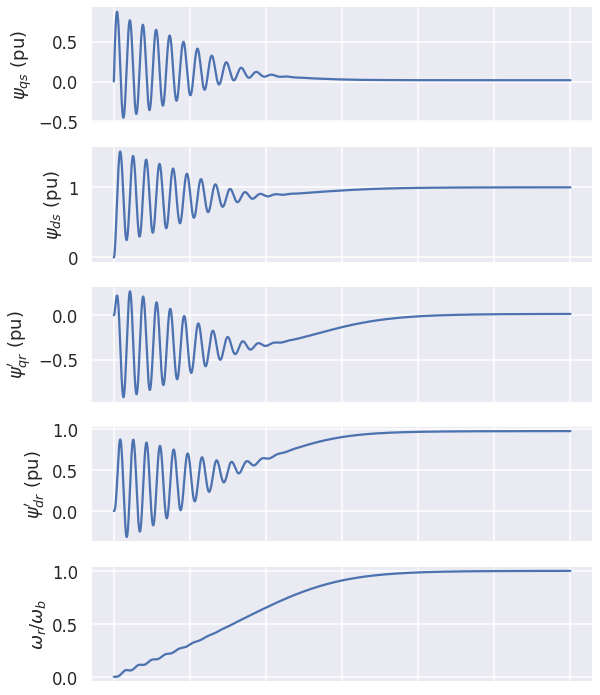

In [ ]:
# voltage source in the synchronous reference frame
V_pk = 1 # pu
w_e = w_b
def v_qdse_fun(t):
  return np.array([V_pk,0])

# derivative function
X_aq = X_ad = 1/(1/X_M + 1/X_ls + 1/X_lrp) # ohm
w = w_e/w_b # reference frame speed (pu)
T_L_coeff = 0 # fan characteristic; 0 for free acceleration; ~1 for rated
def fun(t, y):
  py = np.zeros(6)

  # note: flux linkages in pu
  psi_qs   = y[0]
  psi_ds   = y[1]
  psi_qr   = y[2]
  psi_dr   = y[3]
  w_r      = y[4] # w_r/w_b
  q_r      = y[5] # theta_r

  # note: dividing X's in ohms is OK (same as dividing their pu values)
  psi_mq = X_aq*(psi_qs/X_ls + psi_qr/X_lrp)
  psi_md = X_ad*(psi_ds/X_ls + psi_dr/X_lrp)

  u = v_qdse_fun(t)
  v_qs = u[0]
  v_ds = u[1]

  i_qs = Z_b/X_ls*(psi_qs - psi_mq) # pu
  i_ds = Z_b/X_ls*(psi_ds - psi_md) # pu
  T_e = psi_ds*i_qs - psi_qs*i_ds # pu

  py[0] = w_b*(v_qs - w*psi_ds - r_s/X_ls*(psi_qs - psi_mq))
  py[1] = w_b*(v_ds + w*psi_qs - r_s/X_ls*(psi_ds - psi_md))
  py[2] = w_b*(-(w-w_r)*psi_dr - r_rp/X_lrp*(psi_qr - psi_mq))
  py[3] = w_b*( (w-w_r)*psi_qr - r_rp/X_lrp*(psi_dr - psi_md))

  T_L = T_L_coeff * w_r**2
  py[4] = 1/2/H*(T_e - T_L - D*w_r)
  py[5] = w_b*w_r

  return py


# solve ODE
y_0        = np.zeros(6) # initial condition
t_span     = (0,0.6) # time span
N_pts      = round(t_span[-1]/5e-5)
t_eval     = np.linspace(t_span[0],t_span[-1],N_pts)
sol        = spint.solve_ivp(fun, t_span, y_0, method='LSODA', t_eval=t_eval,\
                             vectorized=False)
print(sol.message)

t = sol.t
psi_qs   = sol.y[0,:]
psi_ds   = sol.y[1,:]
psi_qr   = sol.y[2,:]
psi_dr   = sol.y[3,:]
w_ru     = sol.y[4,:] # w_r/w_b
q_r      = sol.y[5,:]

# post-processing for quantities of interest
psi_mq = X_aq*(psi_qs/X_ls + psi_qr/X_lrp)
psi_md = X_ad*(psi_ds/X_ls + psi_dr/X_lrp)
i_qs = Z_b/X_ls*(psi_qs - psi_mq) # pu
i_ds = Z_b/X_ls*(psi_ds - psi_md) # pu
i_qr = Z_b/X_lrp*(psi_qr - psi_mq) # pu
i_dr = Z_b/X_lrp*(psi_dr - psi_md) # pu
T_e = psi_ds*i_qs - psi_qs*i_ds # pu
q = w_e*t
two_pi_o_3 = 2*np.pi/3
beta = q - q_r
i_as = np.cos(q)*i_qs + np.sin(q)*i_ds
i_bs = np.cos(q - two_pi_o_3)*i_qs + np.sin(q - two_pi_o_3)*i_ds
i_cs = np.cos(q + two_pi_o_3)*i_qs + np.sin(q + two_pi_o_3)*i_ds
i_ar = np.cos(beta)*i_qr + np.sin(beta)*i_dr
i_br = np.cos(beta - two_pi_o_3)*i_qr + np.sin(beta - two_pi_o_3)*i_dr
i_cr = np.cos(beta + two_pi_o_3)*i_qr + np.sin(beta + two_pi_o_3)*i_dr

# plots of states
plt.figure(figsize=(9,15))

ax = plt.subplot(611)
plt.plot(t,psi_qs)
plt.ylabel(r'$\psi_{qs}$ (pu)')
ax.set_xticklabels('')

ax = plt.subplot(612)
plt.plot(t,psi_ds)
plt.ylabel(r'$\psi_{ds}$ (pu)')
ax.set_xticklabels('')

ax = plt.subplot(613)
plt.plot(t,psi_qr)
plt.ylabel(r'$\psi_{qr}^{\prime}$ (pu)')
ax.set_xticklabels('')

ax = plt.subplot(614)
plt.plot(t,psi_dr)
plt.ylabel(r'$\psi_{dr}^{\prime}$ (pu)')
ax.set_xticklabels('')

ax = plt.subplot(615)
plt.plot(t,w_ru)
plt.ylabel(r'$\omega_r/\omega_b$')
ax.set_xticklabels('')


Now, let's plot the solution, trying to imitate  the plots of Figs. 6.10-1 and 6.10-5, on pages 245 & 248, as closely as possible.

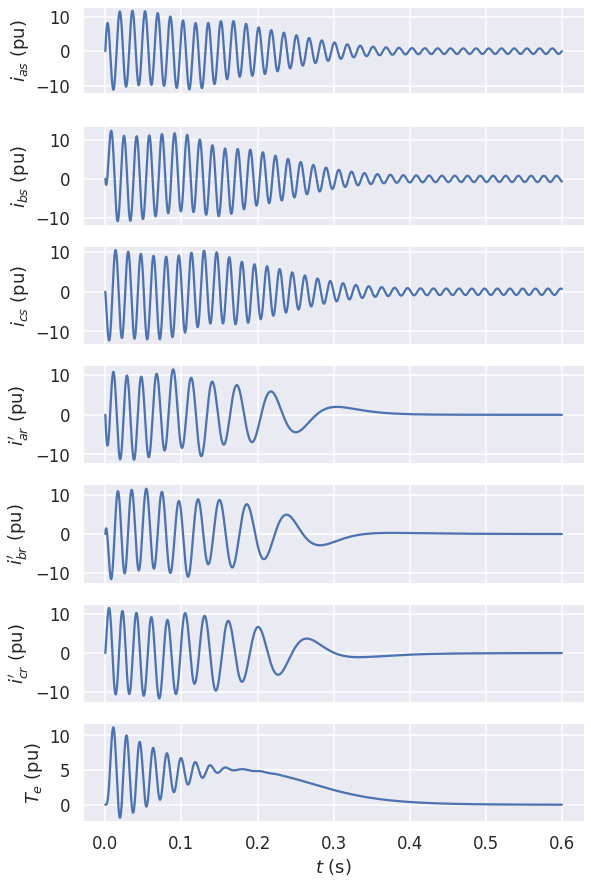

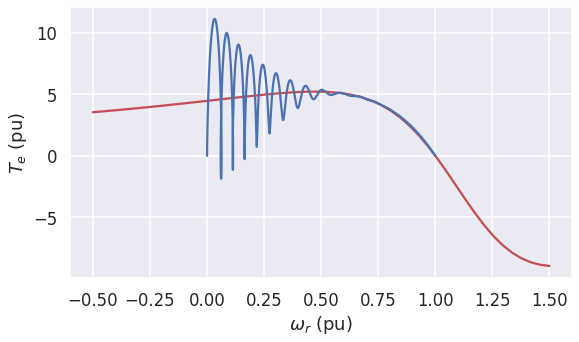

In [ ]:
# Plot quantities of interest wrt time
plt.figure(figsize=(9,15))

ax = plt.subplot(8,1,1)
plt.plot(t,i_as)
plt.ylabel(r'$i_{as}$ (pu)') # 1.0 pu means wrt peak
ax.set_xticklabels('')

ax = plt.subplot(7,1,2)
plt.plot(t,i_bs)
plt.ylabel(r'$i_{bs}$ (pu)') # 1.0 pu means wrt peak
ax.set_xticklabels('')

ax = plt.subplot(7,1,3)
plt.plot(t,i_cs)
plt.ylabel(r'$i_{cs}$ (pu)') # 1.0 pu means wrt peak
ax.set_xticklabels('')

ax = plt.subplot(7,1,4)
plt.plot(t,i_ar)
plt.ylabel(r'$i_{ar}^\prime$ (pu)') # 1.0 pu means wrt peak
ax.set_xticklabels('')

ax = plt.subplot(7,1,5)
plt.plot(t,i_br)
plt.ylabel(r'$i_{br}^\prime$ (pu)') # 1.0 pu means wrt peak
ax.set_xticklabels('')

ax = plt.subplot(7,1,6)
plt.plot(t,i_cr)
plt.ylabel(r'$i_{cr}^\prime$ (pu)') # 1.0 pu means wrt peak
ax.set_xticklabels('')

ax = plt.subplot(7,1,7)
plt.plot(t,T_e)
plt.ylabel(r'$T_e$ (pu)')
plt.xlabel(r'$t$ (s)')

# plot T-omega (steady-state and dynamic)
w_rss = np.linspace(-0.5*w_e,1.5*w_e)
s_ss = (w_e - w_rss)/w_e
X_ss = X_ls + X_M
X_rrp = X_lrp + X_M
T_ess = 3*P/2*w_e/w_b*(X_M**2/w_b)*r_rp*s_ss*(V_bqd0**2/2)/\
  ((r_s*r_rp + s_ss*(w_e/w_b)**2*(X_M**2 - X_ss*X_rrp))**2 + \
   (w_e/w_b)**2*(r_rp*X_ss + s_ss*r_s*X_rrp)**2)

plt.figure(figsize=(9,5))
plt.plot(w_rss/w_b,T_ess/T_b,'r')
plt.plot(w_ru,T_e)
plt.xlabel(r'$\omega_r$ (pu)')
plt.ylabel(r'$T_e$ (pu)');

###Exercises:

1. Repeat the study for the other motors described on page 244.

1. Repeat the study using (a) the stationary reference frame, and (b) the rotor reference frame.

1. Suppose that the voltage source has a nonzero internal impedance. Repeat the study.

1. Repeat the study with a fan-type load on the shaft, which has a quadratic torque-speed characteristic.

1. Perform the studies described in Section 6.12 involving a sudden change in load.

1. Perform the studies described in Section 6.13 involving a three-phase fault at the machine terminals.



---


## Conclusion

We simulated the acceleration of an induction motor.
During this transient, the current drawn from the terminals and the torque are very high and reach several times their rated value.
This is typical behavior of induction motors, and usually soft-starting measures are implemented to alleviate this phenomenon.



